# Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../../datasets/wine.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
data['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [5]:
X = data.iloc[:,:-1]

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [8]:
pca = PCA(n_components=2)

pca.fit(scaled_data)

transformed_data = pca.transform(scaled_data)

In [9]:
X = pd.DataFrame(data=transformed_data, columns=['pc1', 'pc2'])

In [10]:
X.head()

,pc1,pc2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


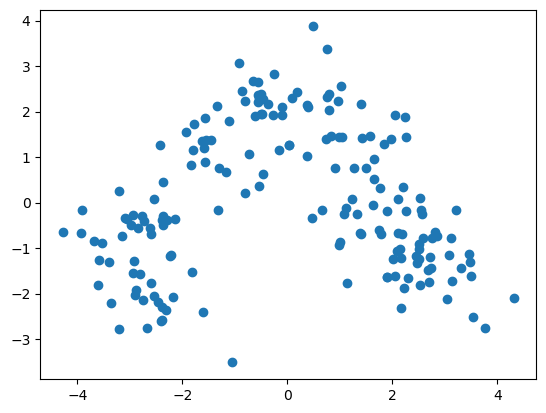

In [11]:
plt.scatter(X.pc1, X.pc2)

## KMeans

In [12]:
from sklearn.cluster import KMeans

In [13]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [14]:
X['cluster'] = y_pred

In [15]:
X.head()

,pc1,pc2,cluster
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


In [18]:
X.cluster.value_counts()

1    65
0    64
2    49
Name: cluster, dtype: int64

In [16]:
km.cluster_centers_

array([[ 2.26614991, -0.86559213],
       [-0.16278513,  1.76758824],
       [-2.74392982, -1.2141906 ]])

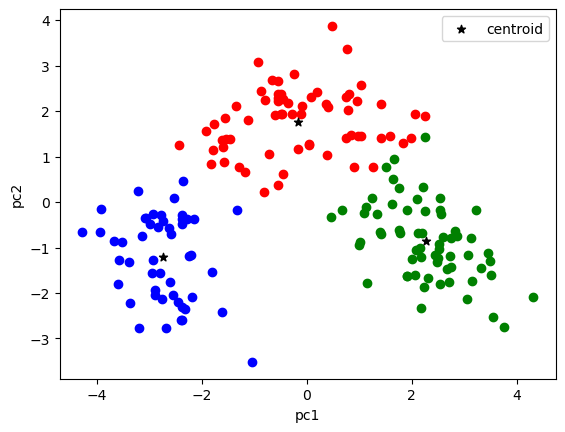

In [17]:
df1 = X[X.cluster==0]
df2 = X[X.cluster==1]
df3 = X[X.cluster==2]
plt.scatter(df1.pc1,df1.pc2,color='green')
plt.scatter(df2.pc1,df2.pc2,color='red')
plt.scatter(df3.pc1,df3.pc2,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()

In [19]:
from sklearn.metrics import silhouette_score

### KMeans silhouette score

In [20]:
silhouette_score(scaled_data, y_pred)

0.2831143774741039

## DBSCAN

In [21]:
from sklearn.cluster import DBSCAN

In [22]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [25]:
dbscan.fit(X.iloc[:, :-1])

DBSCAN()

In [27]:
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  1,  1, -1, -1,  2,  0, -1,  2,
       -1,  0,  1,  0, -1,  0,  0,  2,  2,  1,  0, -1, -1,  0,  2,  3,  0,
        2,  2,  2,  1,  2,  1,  1,  1,  2,  2,  0, -1,  2,  0,  2,  2,  2,
       -1,  2,  2,  1,  2,  1,  2,  0,  0,  2,  1,  2,  2, -1,  2,  2, -1,
        2,  0,  0,  1, -1,  0,  2, -1,  1,  2,  1, -1,  3,  3,  3,  3,  3,
       -1,  3,  3,  3,  3,  3,  3,  3, -1,  3, -1,  3,  4,  4,  4,  4, -1,
        4,  3, -1,  4,  3, -1, -1,  3, -1,  3,  3,  4,  3,  4,  4,  4,  4,
       -1,  3,  4, -1,  4,  4,  4, -1], dtype=int64)

In [28]:
X['cluster'] = y_dbscan_pred

In [29]:
X.cluster.value_counts()

 0    68
-1    31
 2    28
 3    22
 4    15
 1    14
Name: cluster, dtype: int64

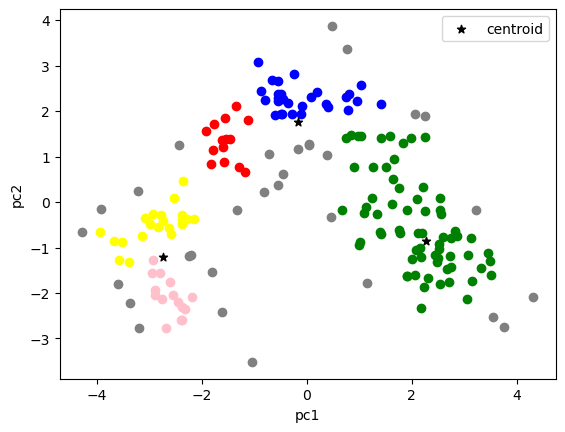

In [31]:
df1 = X[X.cluster==0]
df2 = X[X.cluster==1]
df3 = X[X.cluster==2]
df4 = X[X.cluster==3]
df5 = X[X.cluster==4]
df6 = X[X.cluster==-1]
plt.scatter(df1.pc1,df1.pc2,color='green')
plt.scatter(df2.pc1,df2.pc2,color='red')
plt.scatter(df3.pc1,df3.pc2,color='blue')
plt.scatter(df4.pc1,df4.pc2,color='yellow')
plt.scatter(df5.pc1,df5.pc2,color='pink')
plt.scatter(df6.pc1,df6.pc2,color='gray')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()

## DBSCAN silhouette score

In [30]:
silhouette_score(scaled_data, y_dbscan_pred)

0.09672904268051584

## Agglomerative clustering 

In [32]:
from sklearn.cluster import AgglomerativeClustering 

In [33]:
agglom = AgglomerativeClustering(n_clusters = 3)

In [34]:
ag_y_pred = agglom.fit_predict(X.iloc[:, :-1])

In [37]:
X['cluster'] = ag_y_pred

In [38]:
X['cluster'].value_counts()

0    69
2    61
1    48
Name: cluster, dtype: int64

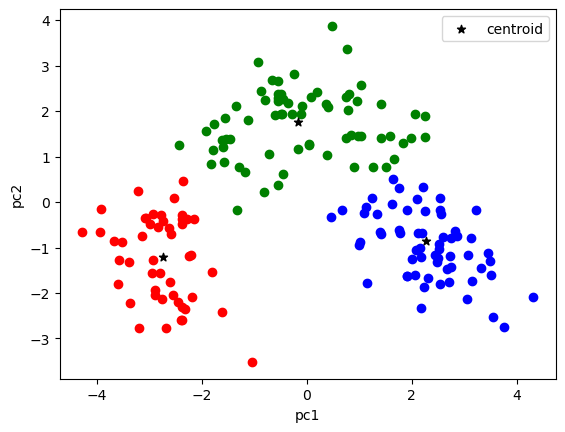

In [39]:
df1 = X[X.cluster==0]
df2 = X[X.cluster==1]
df3 = X[X.cluster==2]
plt.scatter(df1.pc1,df1.pc2,color='green')
plt.scatter(df2.pc1,df2.pc2,color='red')
plt.scatter(df3.pc1,df3.pc2,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()

### Agglomerative clustering silhouette score

In [40]:
silhouette_score(scaled_data, ag_y_pred)

0.28125392181839465